In [528]:
# Importing libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [529]:
#importing dataset
diamonds = pd.read_csv('./data.csv')
diamonds = pd.DataFrame(diamonds)

In [530]:
#first check of dataset
print(diamonds.shape)
display(diamonds.head())

(40455, 10)


,carat,cut,color,clarity,depth,table,x,y,z,price
0,2.26,Ideal,G,SI2,61.9,57.0,8.44,8.36,5.20,12831
1,2.43,Very Good,H,SI2,63.2,57.0,8.56,8.50,5.39,16170
2,0.80,Premium,F,SI2,61.0,57.0,6.03,6.01,3.67,2797
3,0.40,Ideal,F,I1,63.3,60.0,4.68,4.64,2.95,630
4,0.31,Ideal,G,VS2,61.6,55.0,4.39,4.37,2.70,698


In [531]:
#data types
print(diamonds.dtypes)
## cut color and clarity need to be transformed from categorical to ordinal

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object


In [532]:
#Checking nulls
print(diamonds.isnull().sum())
print(diamonds.isna().sum())
##There are no nulls/nas

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64


In [533]:
#describe function
diamonds.describe()

,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.798385,61.747932,57.459085,5.732041,5.735939,3.539537,3939.242813
std,0.474353,1.432322,2.231152,1.123169,1.152802,0.709709,4000.344155
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2409.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5331.000000
max,5.010000,79.000000,79.000000,10.740000,58.900000,31.800000,18823.000000


In [534]:
##parameters
#quant
quant=5
#cut
n1=3
#color
n2=1
#clarity
n3=2

In [535]:
##Binning price column to look at data distribution of categorical columns
labels=[float((i+1)/quant)for i in range(quant)]
diamonds['carat_bin']=pd.qcut(diamonds['carat'],quant,labels=labels)
display(diamonds)
print(diamonds.dtypes)

,carat,cut,color,clarity,depth,table,x,y,z,price,carat_bin
0,2.26,Ideal,G,SI2,61.9,57.0,8.44,8.36,5.20,12831,1.0
1,2.43,Very Good,H,SI2,63.2,57.0,8.56,8.50,5.39,16170,1.0
2,0.80,Premium,F,SI2,61.0,57.0,6.03,6.01,3.67,2797,0.6
3,0.40,Ideal,F,I1,63.3,60.0,4.68,4.64,2.95,630,0.4
4,0.31,Ideal,G,VS2,61.6,55.0,4.39,4.37,2.70,698,0.2
...,...,...,...,...,...,...,...,...,...,...,...
40450,1.11,Premium,H,SI1,62.8,61.0,6.63,6.56,4.14,5315,0.8
40451,0.73,Ideal,F,VS2,62.6,56.0,5.77,5.74,3.60,2762,0.6
40452,1.26,Very Good,I,VS1,59.2,60.0,7.09,7.02,4.18,6855,1.0
40453,0.72,Ideal,G,SI2,61.4,56.0,5.76,5.83,3.56,2297,0.6


carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
carat_bin    category
dtype: object


In [536]:
##Let's look at correlation of numerical variables
corr = diamonds.corr()
print(corr)

          carat     depth     table         x         y         z     price
carat  1.000000  0.024370  0.180861  0.975010  0.944669  0.948835  0.921898
depth  0.024370  1.000000 -0.296418 -0.028645 -0.032708  0.090617 -0.014383
table  0.180861 -0.296418  1.000000  0.195254  0.181997  0.149342  0.125521
x      0.975010 -0.028645  0.195254  1.000000  0.967161  0.966188  0.884500
y      0.944669 -0.032708  0.181997  0.967161  1.000000  0.941816  0.859138
z      0.948835  0.090617  0.149342  0.966188  0.941816  1.000000  0.857643
price  0.921898 -0.014383  0.125521  0.884500  0.859138  0.857643  1.000000


AxesSubplot(0.125,0.125;0.62x0.755)


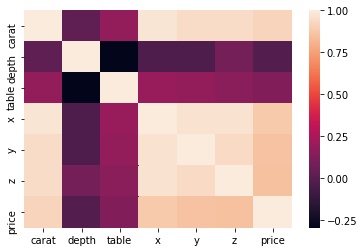

In [537]:
print(sns.heatmap(corr))
#x,y,z and carat are highly correlated. In fact carat is a product of x,y,z hence we drop x,y,z

In [538]:
diamonds.drop(['x', 'y', 'z'], axis=1, inplace=True)
display(diamonds)

,carat,cut,color,clarity,depth,table,price,carat_bin
0,2.26,Ideal,G,SI2,61.9,57.0,12831,1.0
1,2.43,Very Good,H,SI2,63.2,57.0,16170,1.0
2,0.80,Premium,F,SI2,61.0,57.0,2797,0.6
3,0.40,Ideal,F,I1,63.3,60.0,630,0.4
4,0.31,Ideal,G,VS2,61.6,55.0,698,0.2
...,...,...,...,...,...,...,...,...
40450,1.11,Premium,H,SI1,62.8,61.0,5315,0.8
40451,0.73,Ideal,F,VS2,62.6,56.0,2762,0.6
40452,1.26,Very Good,I,VS1,59.2,60.0,6855,1.0
40453,0.72,Ideal,G,SI2,61.4,56.0,2297,0.6


In [539]:
#normalizing
columns = ['carat','depth', 'table']
for col in columns:
    diamonds[col] = (diamonds[col] - np.mean(diamonds[col])) / np.std(diamonds[col]) 
diamonds.head()

,carat,cut,color,clarity,depth,table,price,carat_bin
0,3.081321,Ideal,G,SI2,0.106170,-0.205764,12831,1.0
1,3.439708,Very Good,H,SI2,1.013798,-0.205764,16170,1.0
2,0.003405,Premium,F,SI2,-0.522188,-0.205764,2797,0.6
3,-0.839859,Ideal,F,I1,1.083616,1.138849,630,0.4
4,-1.029593,Ideal,G,VS2,-0.103283,-1.102173,698,0.2


In [540]:
##Let's look at categorical features different values
print(diamonds["cut"].value_counts())

Ideal        16139
Premium      10377
Very Good     9101
Good          3650
Fair          1188
Name: cut, dtype: int64


In [541]:
#converting categorical columns into numerical after consulting relathionship between these variables and prices
def cut_f(df,n1):
    dict_cut={"Ideal":5/5*n1,"Premium":4/5*n1,"Very Good":3/5*n1,"Good":2/5*n1,"Fair":1/5*n1}
    return df.replace({"cut": dict_cut})

##diamonds["cut2"]=cut_f(diamonds,n1)
##diamonds["cut2"]= diamonds.cut2.apply(pd.to_numeric, errors = 'coerce')

diamonds=cut_f(diamonds,n1)
display(diamonds.head())

,carat,cut,color,clarity,depth,table,price,carat_bin
0,3.081321,3.0,G,SI2,0.106170,-0.205764,12831,1.0
1,3.439708,1.8,H,SI2,1.013798,-0.205764,16170,1.0
2,0.003405,2.4,F,SI2,-0.522188,-0.205764,2797,0.6
3,-0.839859,3.0,F,I1,1.083616,1.138849,630,0.4
4,-1.029593,3.0,G,VS2,-0.103283,-1.102173,698,0.2


In [542]:
#converting categorical columns into numerical after consulting relathionship between these variables and prices
def color_f(df,n2):
    dict_color={"D":7/7*n2,"E":6/7*n2,"F":5/7*n2,"G":4/7*n2,"H":3/7*n2,"I":2/7*n2,"J":1/7*n2}
    return df.replace({"color": dict_color})

##diamonds["color2"]=color_f(diamonds,n1)
##diamonds["color2"]= diamonds.color2.apply(pd.to_numeric, errors = 'coerce')

diamonds=color_f(diamonds,n2)
display(diamonds.head())

,carat,cut,color,clarity,depth,table,price,carat_bin
0,3.081321,3.0,0.571429,SI2,0.106170,-0.205764,12831,1.0
1,3.439708,1.8,0.428571,SI2,1.013798,-0.205764,16170,1.0
2,0.003405,2.4,0.714286,SI2,-0.522188,-0.205764,2797,0.6
3,-0.839859,3.0,0.714286,I1,1.083616,1.138849,630,0.4
4,-1.029593,3.0,0.571429,VS2,-0.103283,-1.102173,698,0.2


In [543]:
#converting categorical columns into numerical after consulting relathionship between these variables and prices
def clarity_f(df,n3):
    dict_clarity={"FL":11/11*n3,"IF":10/11*n3,"VVS1":9/11*n3,"VVS2":8/11*n3,"VS1":7/11*n3,"VS2":6/11*n3,"SI1":5/11*n3,"SI2":4/11*n3,"I1":3/11*n3,"I2":2/11*n3,"I3":1/11*n3}
    return df.replace({"clarity": dict_clarity})

##diamonds["clarity2"]=clarity_f(diamonds,n3)
##diamonds["clarity2"]= diamonds.clarity2.apply(pd.to_numeric, errors = 'coerce')

diamonds=clarity_f(diamonds,n3)
display(diamonds.head())

,carat,cut,color,clarity,depth,table,price,carat_bin
0,3.081321,3.0,0.571429,0.727273,0.106170,-0.205764,12831,1.0
1,3.439708,1.8,0.428571,0.727273,1.013798,-0.205764,16170,1.0
2,0.003405,2.4,0.714286,0.727273,-0.522188,-0.205764,2797,0.6
3,-0.839859,3.0,0.714286,0.545455,1.083616,1.138849,630,0.4
4,-1.029593,3.0,0.571429,1.09091,-0.103283,-1.102173,698,0.2


In [544]:
diamonds=pd.DataFrame(diamonds)
print(diamonds.dtypes)

carat         float64
cut           float64
color         float64
clarity        object
depth         float64
table         float64
price           int64
carat_bin    category
dtype: object


In [545]:
diamonds["clarity"]= diamonds.clarity.apply(pd.to_numeric)
print(diamonds.dtypes)

carat         float64
cut           float64
color         float64
clarity       float64
depth         float64
table         float64
price           int64
carat_bin    category
dtype: object


In [546]:
display(diamonds.head())

,carat,cut,color,clarity,depth,table,price,carat_bin
0,3.081321,3.0,0.571429,0.727273,0.106170,-0.205764,12831,1.0
1,3.439708,1.8,0.428571,0.727273,1.013798,-0.205764,16170,1.0
2,0.003405,2.4,0.714286,0.727273,-0.522188,-0.205764,2797,0.6
3,-0.839859,3.0,0.714286,0.545455,1.083616,1.138849,630,0.4
4,-1.029593,3.0,0.571429,1.090909,-0.103283,-1.102173,698,0.2


AxesSubplot(0.125,0.125;0.62x0.755)


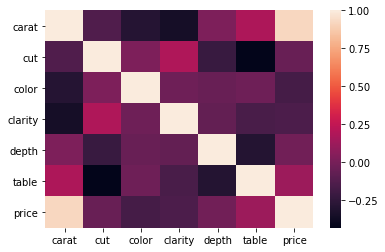

In [547]:
corr2=diamonds.corr()
print(sns.heatmap(corr2))

In [548]:
diamonds.describe()

,carat,cut,color,clarity,depth,table,price
count,4.045500e+04,40455.000000,40455.000000,40455.000000,4.045500e+04,4.045500e+04,40455.000000
mean,5.058369e-17,2.343255,0.629129,1.100747,7.784970e-15,2.578363e-15,3939.242813
std,1.000012e+00,0.668180,0.242760,0.299949,1.000012e+00,1.000012e+00,4000.344155
min,-1.261491e+00,0.600000,0.142857,0.545455,-1.308935e+01,-6.480626e+00,326.000000
25%,-8.398589e-01,1.800000,0.428571,0.909091,-5.221881e-01,-6.539685e-01,950.000000
50%,-2.074106e-01,2.400000,0.571429,1.090909,3.635242e-02,-2.057641e-01,2409.000000
75%,5.093641e-01,3.000000,0.857143,1.272727,5.250754e-01,6.906448e-01,5331.000000
max,8.878763e+00,3.000000,1.000000,1.818182,1.204497e+01,9.654733e+00,18823.000000


In [549]:
##saving clean data
diamonds.to_csv('./clean_diamonds.csv')